In [1]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

import pandas as pd
import numpy as np

#use dataframe pd.DataFrame(data,columns=[list of columns])
#what is np.c_[] ?????????
df_cancer_data = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']], columns = np.append(cancer_data['feature_names'],['target']))


In [13]:
# 3. Train your model

X = df_cancer_data.drop(['target'],axis = 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y = df_cancer_data['target']
y.tail()

564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, dtype: float64

In [21]:
# devide in test train part
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 5)

# use svm model to train

from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# 4. Evaluation of model using test data

y_predict = svc_model.predict(test_X)
y_predict


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_score = accuracy_score(test_y, y_predict)
cm = confusion_matrix(test_y, y_predict)
ac_score

0.5789473684210527

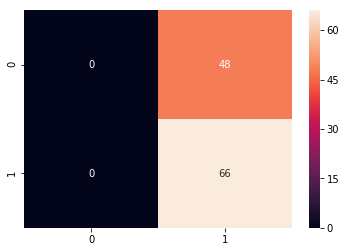

In [28]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [31]:
# 5. pretty bad accuracy..lets improve our model

# Apply normalization on data -  Feature scaling b/w 0 to  1

X_train_min, X_train_max = train_X.min(), train_X.max()
X_test_min, X_test_max = test_X.min(), test_X.max()

X_train_normal = (train_X - X_train_min) / (X_train_max - X_train_min) 
X_test_normal = (test_X - X_test_min) / (X_test_max - X_test_min)

In [32]:
#predict again

svc_model.fit(X_train_normal, train_y)

y_predict_normal = svc_model.predict(X_test_normal)
accuracy_score(test_y, y_predict_normal)

0.956140350877193

In [35]:
# pretty good guesses this time... lets optimize SVM parameters C and Gama to improve our model
# sklearn provide methods to choose the best value of parameter, non need to test them one by one - cross validation

param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

In [36]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

grid.fit(X_train_normal, train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.993421052631579, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9801324503311258, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9736842105263158, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9276315789473685, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9403973509933775, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ..........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
# prdict again using best params
grid_predict = grid.predict(X_test_normal)

In [44]:
#accuracy
accuracy_score(test_y, grid_predict)


0.9736842105263158

In [45]:
#classification report
from sklearn.metrics import classification_report
classification_report(test_y, grid_predict)

'             precision    recall  f1-score   support\n\n        0.0       1.00      0.94      0.97        48\n        1.0       0.96      1.00      0.98        66\n\navg / total       0.97      0.97      0.97       114\n'

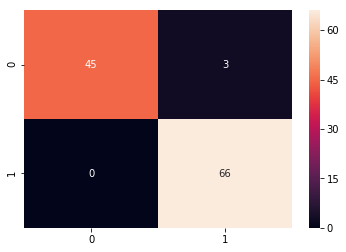

In [46]:
cm = confusion_matrix(test_y, grid_predict)
sns.heatmap(cm, annot = True)

In [ ]:
# No false negative result, cool...False positive are 3 but I guess we are fine with that at this point

#------------------- END of analysis ---------------------------------------